# **03_DataExploration**

## Objectives

* To conduct exploratory data analysis (EDA) to understand which factors are associated with XX to meet business requirement one (Client is interested in determining which demographic, lifestyle, medical and symptom factors are associated with clinical measures of disease, in terms of FEV1 and FVC)

## Inputs

* Raw data generated from "01_DataCollection". Saved as: inputs\datasets\raw\asthma_disease_data.csv

## Outputs

* Generate code that answers business requirement one, and can be used to build the Streamlit App

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden'

# Load Data

Load the data and drop "DoctorInCharge" as not needed for analyses.

In [5]:
import pandas as pd

df_raw_path = "outputs/datasets/cleaned/asthma_disease_data_cleaned.csv"
df = pd.read_csv(df_raw_path)
df.head(10)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63.0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26.0,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57.0,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40.0,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61.0,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0
5,21.0,0,2,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,...,0,2.328191,5.898515,1,0,1,0,0,1,0
6,45.0,1,1,1,30.245954,1,9.371784,7.030507,5.746128,7.664306,...,0,2.995100,1.701512,1,1,1,0,0,0,0
7,26.0,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,...,0,2.069343,4.012260,1,0,0,1,1,1,0
8,49.0,1,1,2,32.676204,0,2.690256,3.920034,5.843645,3.180421,...,1,1.761242,5.190931,1,1,1,1,0,0,0
9,45.0,1,1,1,29.910298,0,2.895720,2.607700,7.234908,1.711722,...,0,2.848420,5.771022,1,0,0,0,1,1,0


---

# Data Exploration
---

Business requirement one focues on identifying the relationships between features and with the target variable (asthma status).

Exploratory data analyses to be performed for each feature, by asthma status.



## Understanding the features and target (additional exploratory data analysis)
---

Descriptive statistics for continuous features (Age, BMI, PhysicalActivity, DietQuality, SleepQuality, DustExposure, PollutionExposure, PollenExposure, LungFunctionFEV1 and LungFunctionFVC):

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   float64
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

Loop over continuous features (float) and show a violin plot (amended from box plot to show distribution). No clear tails on violon plots for continuous features.

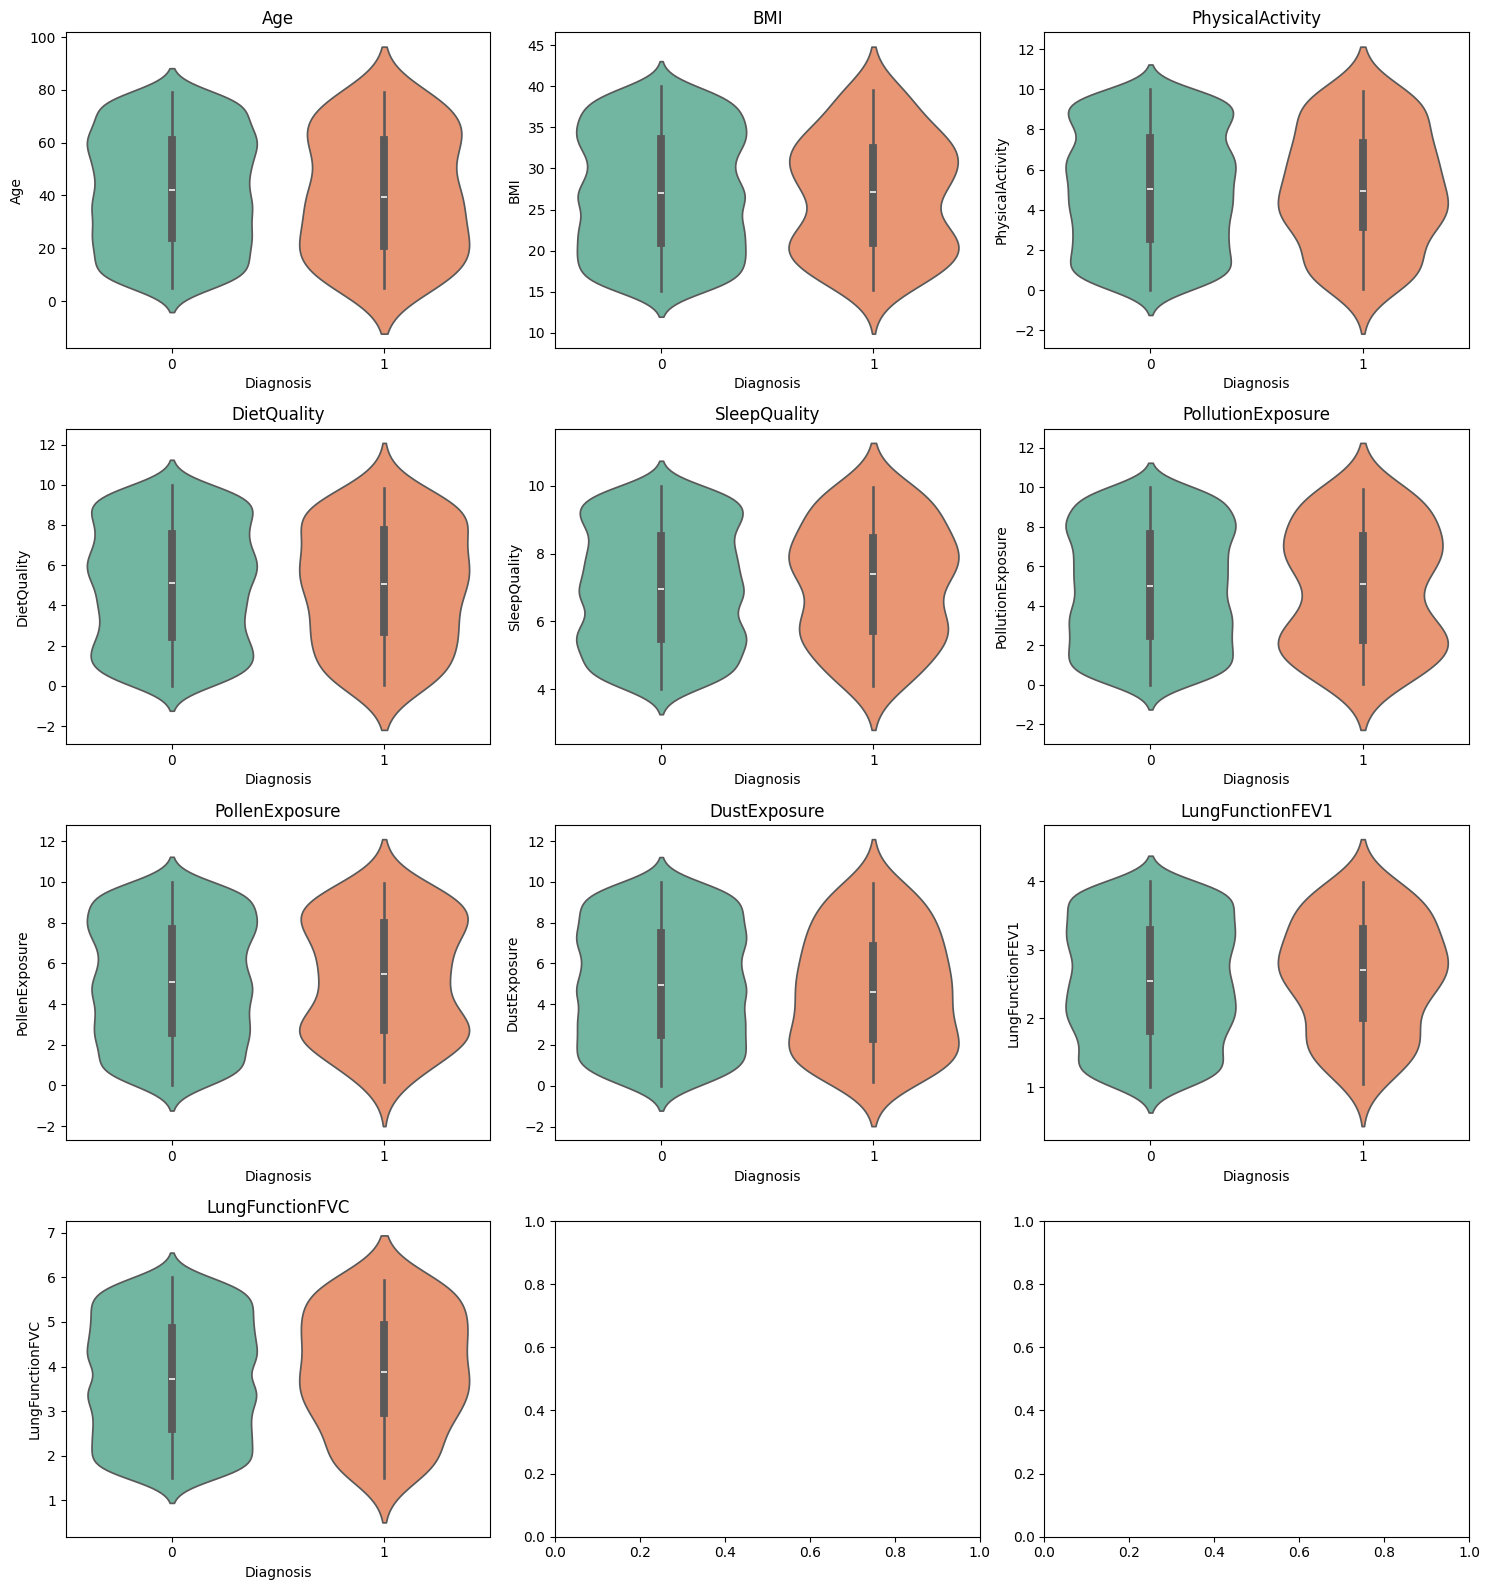

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = df.select_dtypes(include='float').columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for ax, feature in zip(axes, continuous_features):
    sns.violinplot(x='Diagnosis', y=feature, data=df, hue='Diagnosis', ax=ax, inner='box', palette='Set2', legend=False)
    ax.set_title(feature)

plt.tight_layout()
plt.show()


Descriptive statistics for binary (integer) features (Smoking, FamilyHistoryAsthma, PetAllergy, HistoryOfAllergies etc):

As the target and a subset of features are binary (0: No, 1: Yes), contingency tables were generated. Chi squared was run to check significance. 

In [9]:
target = 'Diagnosis'
binary_features = df.select_dtypes(include='int').columns.drop(target)


encoding_maps = {
    # Binary (0/1)
    "Gender": {0: "Male", 1: "Female"},
    "Smoking": {0: "No", 1: "Yes"},
    "PetAllergy": {0: "No", 1: "Yes"},
    "FamilyHistoryAsthma": {0: "No", 1: "Yes"},
    "HistoryOfAllergies": {0: "No", 1: "Yes"},
    "Eczema": {0: "No", 1: "Yes"},
    "HayFever": {0: "No", 1: "Yes"},
    "GastroesophagealReflux": {0: "No", 1: "Yes"},
    "Wheezing": {0: "No", 1: "Yes"},
    "ShortnessOfBreath": {0: "No", 1: "Yes"},
    "ChestTightness": {0: "No", 1: "Yes"},
    "Coughing": {0: "No", 1: "Yes"},
    "NighttimeSymptoms": {0: "No", 1: "Yes"},
    "ExerciseInduced": {0: "No", 1: "Yes"},
    "Diagnosis": {0: "No", 1: "Asthma"},

    # Multi-class categorical
    "Ethnicity": {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other"
    },
    "EducationLevel": {
        0: "None",
        1: "High School",
        2: "Bachelor's",
        3: "Higher"
    }
}

# Loop over features and create contingency tables
for feature in binary_features:
    # Map encoding
    target_labels = df[target].map(encoding_maps.get(target, {}))
    feature_labels = df[feature].map(encoding_maps.get(feature, {}))

    # Contigency table targets
    contingency = pd.crosstab(target_labels, feature_labels)

    print(f"Contingency table: {target} vs {feature}")
    print(contingency)
    print("-"*30)

Contingency table: Diagnosis vs Gender
Gender     Female  Male
Diagnosis              
Asthma         62    62
No           1118  1150
------------------------------
Contingency table: Diagnosis vs Ethnicity
Ethnicity  African American  Asian  Caucasian  Other
Diagnosis                                           
Asthma                   25     11         73     15
No                      450    218       1392    208
------------------------------
Contingency table: Diagnosis vs EducationLevel
EducationLevel  Bachelor's  High School  Higher  None
Diagnosis                                            
Asthma                  29           51      19    25
No                     720          882     213   453
------------------------------
Contingency table: Diagnosis vs Smoking
Smoking      No  Yes
Diagnosis           
Asthma      110   14
No         1943  325
------------------------------
Contingency table: Diagnosis vs PetAllergy
PetAllergy    No  Yes
Diagnosis            
Asthma       

Ethnicity and education level have more than two categories. To be combined to maximise base size for analyses:

In [10]:
# Create a copy of the dataframe
df_updated = df.copy()

# Replace Ethnicity values
df_updated['Ethnicity'] = df_updated['Ethnicity'].replace({
    0: 0,  # keep White as 0
    1: 1,  # African American → 1
    2: 1,  # Asian → 1
    3: 1   # Other → 1
})

# Replace EducationLevel values
df_updated['EducationLevel'] = df_updated['EducationLevel'].replace({
    1: 1,  # Bachelor/Higher → 1
    2: 1,  # Bachelor/Higher → 1
    3: 0   # None/High school → 0
})

df_updated.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63.0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26.0,1,1,1,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57.0,0,1,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40.0,1,1,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61.0,0,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [11]:
for col in ['Ethnicity', 'EducationLevel']:
    contingency = pd.crosstab(target_labels, df_updated[col])
    print(f"Contingency table: Diagnosis vs {col}")
    print(contingency)
    print("-"*30)

Contingency table: Diagnosis vs Ethnicity
Ethnicity     0    1
Diagnosis           
Asthma       73   51
No         1392  876
------------------------------
Contingency table: Diagnosis vs EducationLevel
EducationLevel    0     1
Diagnosis                
Asthma           44    80
No              666  1602
------------------------------


## Association between the features and the target
---

### Continous features
Association between continuous features and asthma diagnosis was testing using bivariate analyses, t-test or Mann-Whitney, based on normality.


In [12]:
from scipy.stats import mannwhitneyu, ttest_ind, shapiro

continuous_features = df_updated.select_dtypes(include='float').columns.tolist()

# Create an empty dictionary for the results
continuous_results = {}

# Loop through features, ignore NaN data, and add significance finding
for feature in continuous_features:
    group0 = df_updated[df_updated['Diagnosis'] == 0][feature].dropna()
    group1 = df_updated[df_updated['Diagnosis'] == 1][feature].dropna()
    
    # Check normality
    _, p0 = shapiro(group0) if len(group0) >= 3 else (None, 0)  # Shapiro requires ≥3 samples
    _, p1 = shapiro(group1) if len(group1) >= 3 else (None, 0)
    
    # Choose t-test if normal distribution, else Mann-Whitney 
    if p0 > 0.05 and p1 > 0.05:
        stat, p = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
        test_name = "t-test"
    else:
        stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
        test_name = "Mann-Whitney U"
    
    significance = "Significant" if p < 0.05 else "Not significant"
    
    # Overview of the output
    continuous_results[feature] = {
        "test": test_name,
        "statistic": stat,
        "p-value": p,
        "significance": significance
    }

# Create a dataframe
continuous_results_df = pd.DataFrame(continuous_results).T
continuous_results_df


,test,statistic,p-value,significance
Age,Mann-Whitney U,146059.0,0.467335,Not significant
BMI,Mann-Whitney U,145235.0,0.53742,Not significant
PhysicalActivity,Mann-Whitney U,138709.0,0.799048,Not significant
DietQuality,Mann-Whitney U,141866.0,0.867489,Not significant
SleepQuality,Mann-Whitney U,133797.0,0.362564,Not significant
PollutionExposure,Mann-Whitney U,142477.0,0.803796,Not significant
PollenExposure,Mann-Whitney U,135082.0,0.459967,Not significant
DustExposure,Mann-Whitney U,150209.0,0.200225,Not significant
LungFunctionFEV1,Mann-Whitney U,132190.0,0.260556,Not significant
LungFunctionFVC,Mann-Whitney U,129757.0,0.147069,Not significant


Findings:
* All continuous features were not normally distributed, meaning Mann-Whitney was performed.
* The asthma and non‑asthma groups look statistically similar; no variable was statistically significant. 


### Binary features
Association between binary features and asthma diagnosis:

In [13]:
from scipy.stats import chi2_contingency, fisher_exact

# Remove diagnosis for analysis
binary_features = [col for col in df_updated.select_dtypes('int').columns if col != 'Diagnosis']

# Create an empty dictionary for the results
binary_results = {}

# Loop through features, recreate contigency tables, and add significance finding
for feature in binary_features:
    table = pd.crosstab(df_updated[feature], df_updated['Diagnosis'])

    # Run chi-square test
    chi2, p_chi, dof, expected = chi2_contingency(table)
    
    # Decide whether to use Fisher (if any expected count < 5)
    if (expected < 5).any():
        oddsratio, p_value = fisher_exact(table)
        test_used = "Fisher's exact"
    else:
        p_value = p_chi
        oddsratio = (table.iloc[1,1] / table.iloc[1,0]) / (table.iloc[0,1] / table.iloc[0,0])
        test_used = "Chi-square"
    
    # Significance
    significance = "Significant" if p_value < 0.05 else "Not significant"

    # Overview of the output
    binary_results[feature] = {
        "test": test_used,
        "p-value": p_value,
        "odds_ratio": oddsratio,
        "significance": significance
    }

# Create a dataframe
binary_results_df = pd.DataFrame(binary_results).T
binary_results_df

,test,p-value,odds_ratio,significance
Gender,Chi-square,0.951543,1.028623,Not significant
Ethnicity,Chi-square,0.643505,1.110152,Not significant
EducationLevel,Chi-square,0.176599,0.755873,Not significant
Smoking,Chi-square,0.416359,0.760895,Not significant
PetAllergy,Chi-square,0.606093,0.846368,Not significant
FamilyHistoryAsthma,Chi-square,1.0,0.986941,Not significant
HistoryOfAllergies,Chi-square,0.998995,0.982163,Not significant
Eczema,Chi-square,0.761792,0.903711,Not significant
HayFever,Chi-square,0.40648,0.811976,Not significant
GastroesophagealReflux,Chi-square,0.323529,1.297627,Not significant


Most binary features showed no significant association with asthma status. The exception was ExcerciseInduced, which showed a statistically significant association, with an odds ratio of 1.7. This indicates that exercise induced symptoms were 1.7 times more likely to be reported by patients with asthma.

---

## Power Predictive Score
---

Heatmap with Power Predictive Score (PPS) 
* PPS detects both linear and non-linear relationships between two variables and helps assess predictive relationships and potential multicollinearity. Scores range from 0 (no predictive power) to 1 (perfect predictive power).

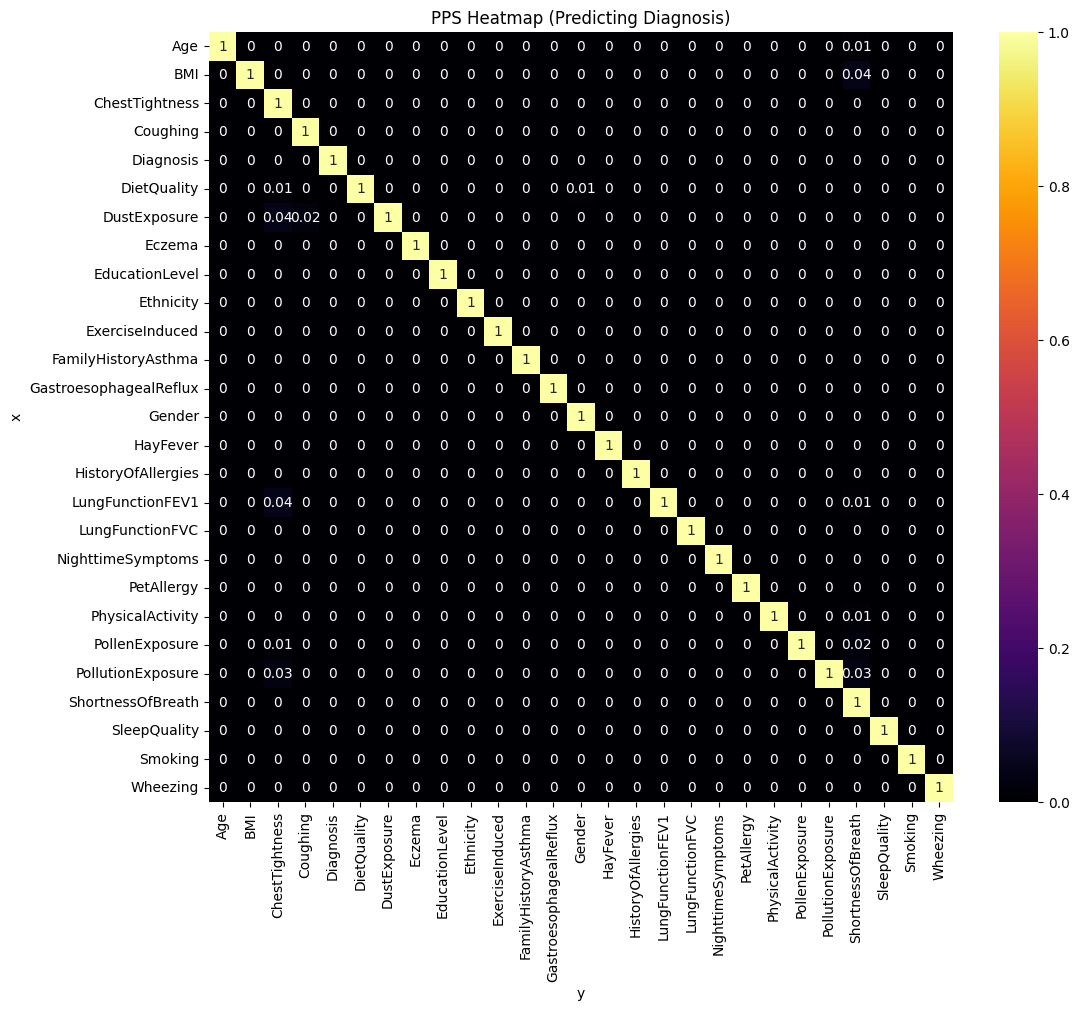

In [19]:
import ppscore as pps

pps_matrix = pps.matrix(df)


heatmap_data = pps_matrix.pivot(
    index="x",
    columns="y",
    values="ppscore"
).round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="inferno"
)
plt.title("PPS Heatmap (Predicting Asthma Status)")
plt.show()


# Train and Test Set

Split the database, based on code from the "churnometer" walkthough example:

In [41]:
df_updated.head(10)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63.0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26.0,1,1,1,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57.0,0,1,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40.0,1,1,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61.0,0,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0
5,21.0,0,1,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,...,0,2.328191,5.898515,1,0,1,0,0,1,0
6,45.0,1,1,1,30.245954,1,9.371784,7.030507,5.746128,7.664306,...,0,2.995100,1.701512,1,1,1,0,0,0,0
7,26.0,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,...,0,2.069343,4.012260,1,0,0,1,1,1,0
8,49.0,1,1,1,32.676204,0,2.690256,3.920034,5.843645,3.180421,...,1,1.761242,5.190931,1,1,1,1,0,0,0
9,45.0,1,1,1,29.910298,0,2.895720,2.607700,7.234908,1.711722,...,0,2.848420,5.771022,1,0,0,0,1,1,0


In [42]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet, _, __ = train_test_split(
                                        df_updated,
                                        df_updated['Diagnosis'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1913, 27) 
TestSet shape: (479, 27)


Push the train and test dataset:

In [43]:
import os

os.makedirs("outputs/datasets/cleaned", exist_ok=True)

# Train set
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

# Test set
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

# Conclusion and Next Steps
---

To answer Business Question One, initial bivariate analyses was performed to understand the distribution of data and the relationships between the target (Diagnosis) and features.

Continuous features were visualized using violin plots to understand distribution. In this dataset, most features showed overlapping violin shapes with no clear tails.  Shapiro-Wilk test was used to test the distrubiton of continuous features; as all features passed the distrubution test, non-parametric (Mann-Whitney) test was performed. No continuous features were significantly associated with asthma status (Diagnosis).

Additionally, contigency tables were generated for binary features. Due to the low bases for specific subgroups, groups were combined to maximize bases for EducationLevel and Ethnicity (two categories for both). Chi-square test wa performed for all features; ExerciseInduced was significantly associated with asthma status (Diagnosis).

Train and test sets were generated for feature engineering and modeling. 

Next steps:
* Prepare data for feature engineering and modeling, to answer Business Requirement Two.